In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Train and test data
df= pd.read_csv("Train.csv")
#dft = pd.read_csv("Test.csv")

In [ ]:
df[df['is_holiday']!='None'].head()


,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
126,2012-10-08 00:00:00,Columbus Day,144,45,9,300,5,5,273.08,0.0,0.0,20,Clouds,few clouds,455
1123,2012-11-12 00:00:00,Veterans Day,119,78,1,50,4,4,288.12,0.0,0.0,87,Clear,sky is clear,1000
1370,2012-11-22 00:00:00,Thanksgiving Day,242,78,4,320,2,2,278.54,0.0,0.0,20,Mist,mist,919
2360,2012-12-25 00:00:00,Christmas Day,87,53,2,230,8,8,264.40,0.0,0.0,90,Clouds,overcast clouds,803
2559,2013-01-01 00:00:00,New Years Day,260,72,2,130,4,4,263.49,0.0,0.0,58,Clouds,broken clouds,1439


In [ ]:
#numerical features
nums = list(df._get_numeric_data().columns)

#categorical features985391826
cats = list(set(df.columns) - set(df._get_numeric_data().columns))

#Filtering
df = df[df['temperature'] != 0]

#lower case w_desc
df['weather_description'] = df['weather_description'].str.lower()
dft['weather_description'] = dft['weather_description'].str.lower()

# Encoding the is_holiday feature column
df['is_holiday'] = np.where(df['is_holiday']=='None', 'No', 'Yes')
dft['is_holiday'] = np.where(dft['is_holiday']=='None', 0, 1)

# Encoding the weather_type feature column
df['weather_type'] =df['weather_type'].astype('category').cat.codes
dft['weather_type'] =dft['weather_type'].astype('category').cat.codes


#Converting the date_time object to represent hour of the day
df['date_time']= pd.to_datetime(df['date_time'])
df['date_time']=df['date_time'].dt.hour

dft['date_time']= pd.to_datetime(dft['date_time'])
dft['date_time']=dft['date_time'].dt.hour

# Finding the corelaton of all the columns with traffic_volume
df[df.columns[:]].corr()['traffic_volume'][:]

df1 = df['weather_type'].astype(str).str.get_dummies(" ")
df2 = df['is_holiday'].astype(str).str.get_dummies(" ")
df=df.drop(['weather_type','is_holiday','weather_description'],axis=1)
ck = pd.concat([df, df1,df2], axis=1)
ck.drop(ck.columns[1:7],axis=1,inplace=True)
ck.drop(ck.columns[2:5],axis=1,inplace=True)
cols = ['date_time','0','1','2','3','4','5','6','7','8','9','10','No','Yes','traffic_volume']
df = ck[cols]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

NameError: ignored

(10.0, 0.0)

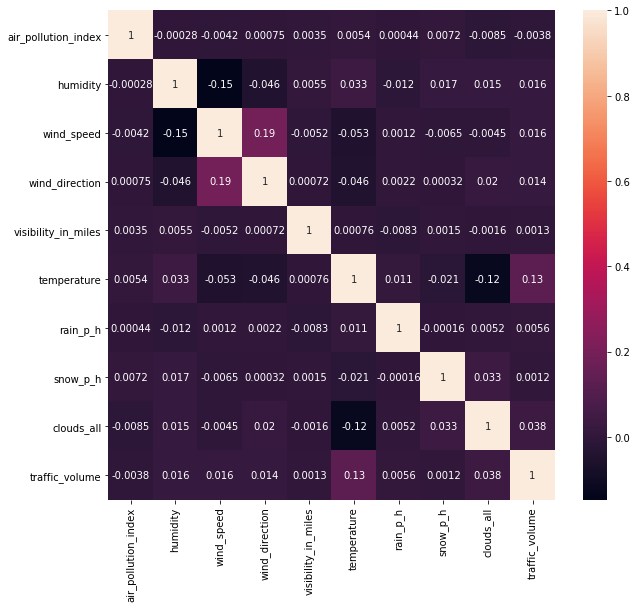

In [ ]:
#df.drop('dew_point', axis = 1,inplace=True)
plt.figure(figsize=(10,9))
ax=sns.heatmap(df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


TypeError: ignored

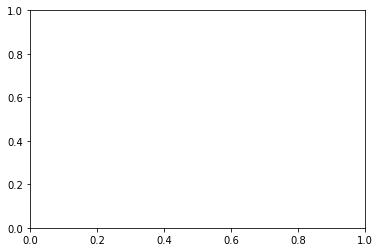

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# define base model
def baseline_model():
  model = Sequential()
  model.add(Dense(14, input_dim=14, kernel_initializer='normal',activation='relu'))
  model.add(Dense(7, kernel_initializer='normal', activation='relu'))
  #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=40, batch_size=10, verbose=0)

#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, y, cv=kfold)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 9,train_size = 0.7)
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print("Results: %.2f) MSE" % (np.sqrt(mean_squared_log_error(y_test, y_predicted))))


Results: 3467063.83) MSE


In [ ]:
from sklearn.metrics import mean_squared_error
print("Results: %.2f) MSE" % (mean_squared_error(y_test, y_predicted)))

Results: 3471761.05) MSE
